In [22]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
## 1. load in data
df = pd.read_csv('SEER.csv')
df

,Age with single ages and 100+,Sex,Year of diagnosis,Race,Ethnicity,Marital status at diagnosis,Primary Site,Histologic Type ICD-O-3,Grade,Summary Stage (2004+),Surgery of Primary Site,Radiation,Chemotherapy,COD recode,Survival recode,Appalachia,SEER registry state,Unnamed: 17
0,66,0,2013,1,0,1,18.0,8263,2,1,1,0,0,2,1,0,Georgia,NaN
1,70,0,2010,0,0,1,18.7,8140,2,1,0,1,1,0,0,0,Georgia,NaN
2,48,0,2001,0,0,1,18.7,8140,2,99,1,0,0,2,1,0,Georgia,NaN
3,54,0,2006,1,0,1,18.2,8490,3,3,1,0,0,1,0,0,Georgia,NaN
4,88,1,2009,0,0,0,18.0,8140,2,3,1,0,0,1,0,0,Kentucky,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149237,39,1,2010,0,0,0,18.6,8140,2,2,1,0,0,2,1,1,Georgia,NaN
149238,69,1,2017,0,0,99,18.4,8140,2,1,1,0,0,2,0,1,Georgia,NaN
149239,52,1,2007,1,0,0,18.5,8140,2,3,0,0,1,0,0,1,Georgia,NaN
149240,72,1,2003,0,0,0,18.5,8140,3,99,1,0,0,0,1,1,Georgia,NaN


In [24]:

## 2. write a function Age [30,50] & Appalachia == 1
def printPatientRecords(df):
    age3050df = df[(df['Age with single ages and 100+'] >= 30) & (df['Age with single ages and 100+']<= 50) & (df['Appalachia'] == 1)]
    return age3050df
df = printPatientRecords(df)
df


,Age with single ages and 100+,Sex,Year of diagnosis,Race,Ethnicity,Marital status at diagnosis,Primary Site,Histologic Type ICD-O-3,Grade,Summary Stage (2004+),Surgery of Primary Site,Radiation,Chemotherapy,COD recode,Survival recode,Appalachia,SEER registry state,Unnamed: 17
81530,39,1,2008,0,0,1,18.7,8140,2,2,1,0,1,2,1,1,Georgia,NaN
81541,49,1,2005,0,0,0,18.7,8481,1,1,1,0,1,2,1,1,Georgia,NaN
81553,50,0,2008,1,0,1,18.6,8210,2,1,1,0,0,2,1,1,Georgia,NaN
81556,42,0,2007,0,0,0,18.3,8140,2,2,1,0,0,2,1,1,Georgia,NaN
81563,46,0,2000,1,0,1,18.0,8140,2,99,1,0,1,2,1,1,Georgia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149205,41,0,2002,0,0,0,18.7,8263,1,99,1,0,0,2,1,1,Georgia,NaN
149225,49,0,2017,1,0,1,18.7,8140,2,1,1,0,0,2,0,1,Georgia,NaN
149231,48,1,2002,0,0,1,18.7,8140,2,99,1,0,0,2,1,1,Georgia,NaN
149236,50,1,2014,0,0,0,19.9,8261,2,1,1,0,0,2,0,1,Georgia,NaN


<Axes: >

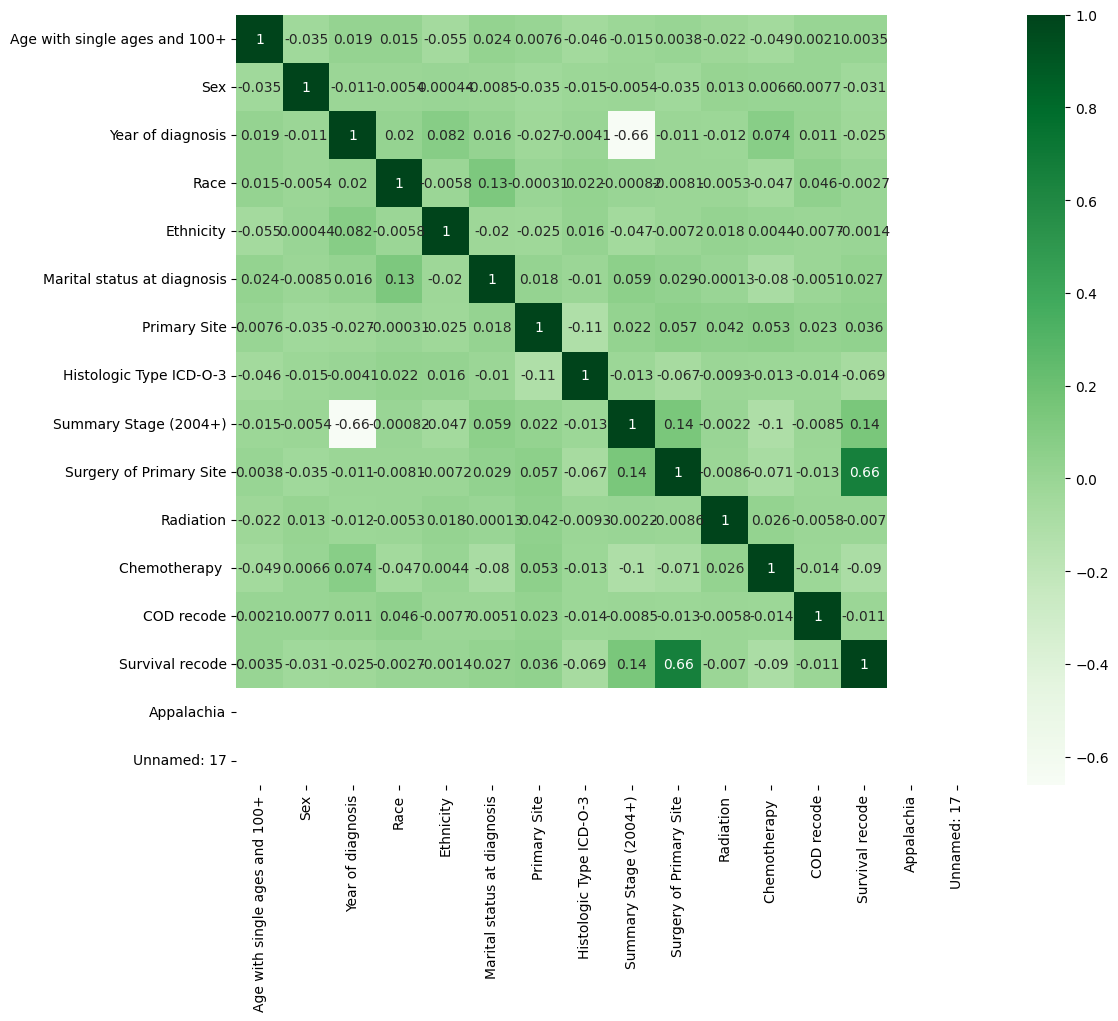

In [25]:
## 3. create a heatmap using seaborn and list high important features

#numerical values only
heatmapdf = df.select_dtypes(include=['number'])

corr = heatmapdf.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='Greens')

##features of high importance - Summary Stage(2004+), Year of Diagnosis, Surgery of Primary site & Survival recode
##both correlation of 0.66, summary stage and year of diagnosis are of high importance
## surgery site and survival; showing that survival has a lot of correlation with location of surgery
## I think age, primary site, and histologic type could be important, they seem significant to the data.

##(After PCA) Selecting by visualization - Radiation, Surgery of Primary Site, Primary Site, Ethnicity, Race, Year of Diagnosis

In [26]:
##is cause because of lead infusion near coal mines or distance from hospital
## PCA Validation
#sns.pairplot(heatmapdf)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = heatmapdf.drop(['Appalachia', 'Unnamed: 17'], axis=1)
scaler = StandardScaler()
scaler.fit(X)
scaled_data = scaler.transform(X)

pca = PCA(n_components=None)
pca.fit(scaled_data)


PCA()

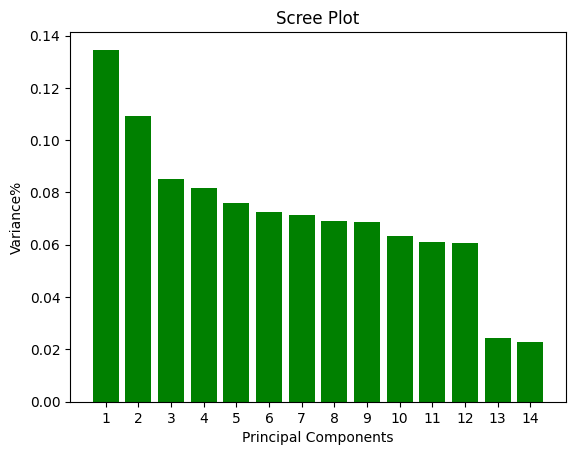

In [27]:
PCA_values = range(1, pca.n_components_+1)
plt.bar(PCA_values, pca.explained_variance_ratio_, color='green')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance%')
plt.xticks(PCA_values)
plt.show()

In [28]:
print(pca.explained_variance_ratio_)

[0.13457891 0.10916119 0.08511771 0.0816414  0.07584442 0.07238237
 0.07120426 0.06907612 0.06869423 0.06346255 0.0610188  0.06065537
 0.02430498 0.0228577 ]


In [29]:
PCnames = ['PC'+str(i+1) for i in range(pca.n_components_)]
print (PCnames)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14']


In [30]:
Loadings = pd.DataFrame(pca.components_, columns=PCnames, index=X.columns)

In [31]:
Loadings.iloc[:,:6]


,PC1,PC2,PC3,PC4,PC5,PC6
Age with single ages and 100+,0.011112,-0.039369,-0.425766,0.003137,-0.078890,0.080344
Sex,0.044379,-0.069451,0.560254,0.010199,0.106959,0.017390
Year of diagnosis,0.250249,-0.070506,0.093685,0.560427,-0.088854,0.547632
Race,0.295642,-0.094423,-0.012689,0.114740,-0.291230,0.162521
Ethnicity,0.553697,-0.261080,0.007411,-0.334037,-0.387910,-0.255691
Marital status at diagnosis,-0.025711,0.660231,0.008193,-0.024303,-0.144635,-0.201445
Primary Site,-0.173064,-0.602894,-0.041331,0.092973,0.137024,-0.227877
Histologic Type ICD-O-3,0.396110,-0.066289,-0.022293,-0.213937,0.606843,-0.148191
Summary Stage (2004+),0.186468,-0.018296,0.027097,-0.017572,-0.469712,-0.173250
Surgery of Primary Site,0.501189,0.156841,-0.098893,0.467260,0.287896,-0.223278


<Axes: >

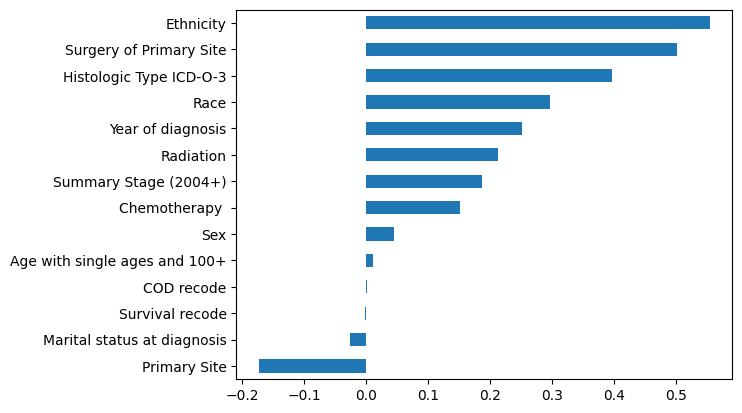

In [32]:
#choosing features from number - Primary site, Surgery of Primary Site, Radiation
#checking with bar chart
Loadings["PC1"].sort_values().plot.barh()
#actual importance - Ethnicity, Surgery of Primary Site, Histologic Type ICD-O-3,Primary Site

<Axes: >

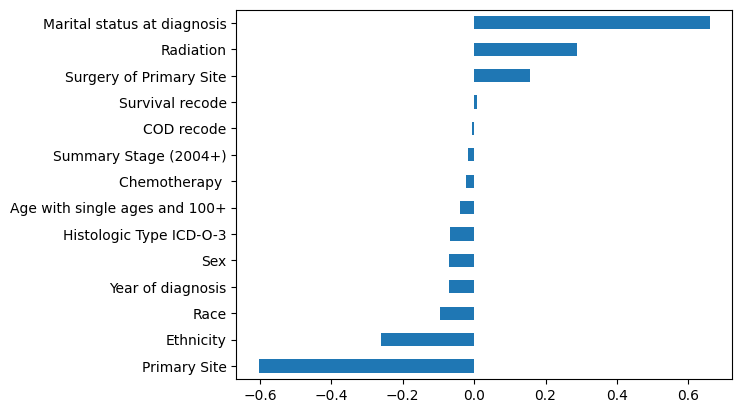

In [33]:
Loadings["PC2"].sort_values().plot.barh()
#Martial status, Radiation, Ethnicity, Primary Site

#Selecting by visualization - Radiation, Surgery of Primary Site, Primary Site, Ethnicity, Race, Year of Diagnosis

In [34]:
X_pca = pca.transform(scaled_data)
pca.components_ #how feaures are contributing to each component

array([[ 1.11119584e-02, -3.93694516e-02, -4.25765914e-01,
         3.13681188e-03, -7.88900950e-02,  8.03440123e-02,
         8.36268267e-02, -9.19087867e-02,  5.11994308e-01,
         4.93065253e-01, -6.88409756e-03, -1.88328098e-01,
        -1.74373591e-02,  4.97845557e-01],
       [ 4.43787751e-02, -6.94507499e-02,  5.60254086e-01,
         1.01987993e-02,  1.06958974e-01,  1.73895896e-02,
         6.48942996e-02, -1.27148457e-01, -4.56285169e-01,
         4.71786648e-01, -1.63540147e-02,  2.61391815e-02,
         1.61478041e-03,  4.64075129e-01],
       [ 2.50248732e-01, -7.05063999e-02,  9.36852112e-02,
         5.60427443e-01, -8.88536598e-02,  5.47632478e-01,
        -1.90027402e-01,  1.51535111e-01, -3.28114528e-02,
        -5.96585222e-02, -1.69945295e-01, -4.33000172e-01,
         1.39992700e-01, -4.55492656e-02],
       [ 2.95642329e-01, -9.44226096e-02, -1.26886619e-02,
         1.14739992e-01, -2.91229862e-01,  1.62521105e-01,
         6.11532692e-01, -5.40127493e-01, -1.

Text(0, 0.5, 'Second Principal component')

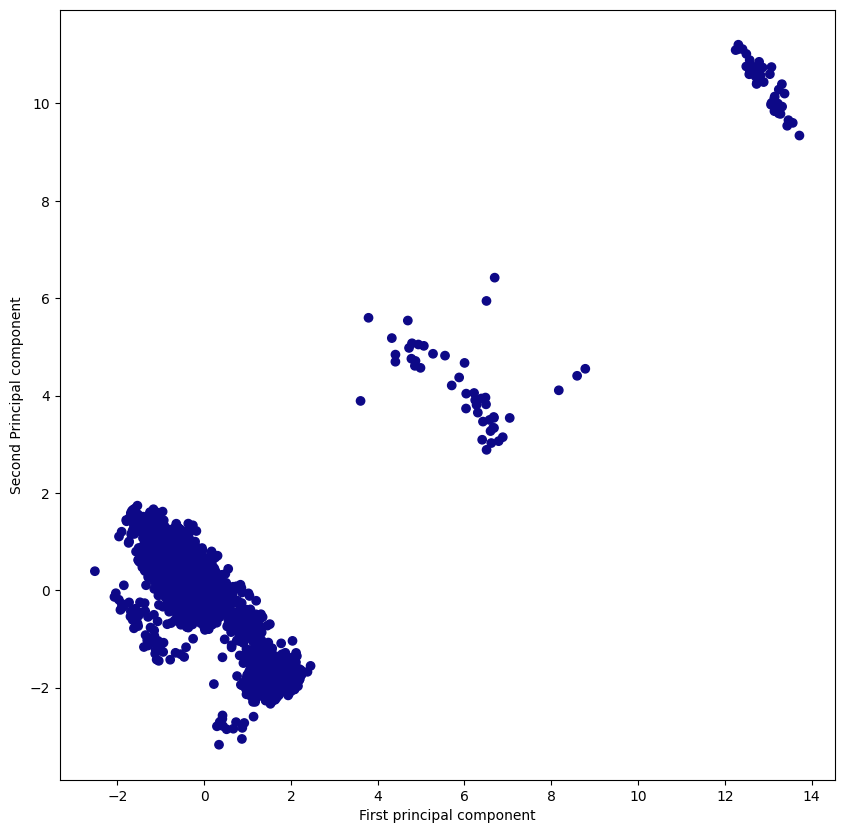

In [35]:

plt.figure(figsize=(10,10))

plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Appalachia'], cmap='plasma') 

plt.xlabel('First principal component')
plt.ylabel('Second Principal component')

In [36]:
import numpy as np
df = pd.read_csv('SEER.csv')
seer_df = df
data1 = seer_df.drop(['Unnamed: 17','SEER registry state'],axis=1)
#print(seer_df.shape[0])

recordsRemoved = df.shape[1] - data1.shape[1]
if recordsRemoved == 0:
    print('zero records removed')
else:
    print(recordsRemoved)


2


In [37]:
data2 = data1.rename(columns={'Marital status at diagnosis':'Marital_Status', 
                                "Summary Stage": "Summary_Stage",
    "Surgery of Primary Site": "Primary_Site",
    "SEER registry state": "SEER_State",
    "Survival recode": "Survival_Recode"})
data2


,Age with single ages and 100+,Sex,Year of diagnosis,Race,Ethnicity,Marital_Status,Primary Site,Histologic Type ICD-O-3,Grade,Summary Stage (2004+),Primary_Site,Radiation,Chemotherapy,COD recode,Survival_Recode,Appalachia
0,66,0,2013,1,0,1,18.0,8263,2,1,1,0,0,2,1,0
1,70,0,2010,0,0,1,18.7,8140,2,1,0,1,1,0,0,0
2,48,0,2001,0,0,1,18.7,8140,2,99,1,0,0,2,1,0
3,54,0,2006,1,0,1,18.2,8490,3,3,1,0,0,1,0,0
4,88,1,2009,0,0,0,18.0,8140,2,3,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149237,39,1,2010,0,0,0,18.6,8140,2,2,1,0,0,2,1,1
149238,69,1,2017,0,0,99,18.4,8140,2,1,1,0,0,2,0,1
149239,52,1,2007,1,0,0,18.5,8140,2,3,0,0,1,0,0,1
149240,72,1,2003,0,0,0,18.5,8140,3,99,1,0,0,0,1,1


In [38]:
data2 = data2.drop(['Histologic Type ICD-O-3', 'Radiation'],axis=1)
data2 = data2.drop(['Chemotherapy '], axis=1)
data2

,Age with single ages and 100+,Sex,Year of diagnosis,Race,Ethnicity,Marital_Status,Primary Site,Grade,Summary Stage (2004+),Primary_Site,COD recode,Survival_Recode,Appalachia
0,66,0,2013,1,0,1,18.0,2,1,1,2,1,0
1,70,0,2010,0,0,1,18.7,2,1,0,0,0,0
2,48,0,2001,0,0,1,18.7,2,99,1,2,1,0
3,54,0,2006,1,0,1,18.2,3,3,1,1,0,0
4,88,1,2009,0,0,0,18.0,2,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149237,39,1,2010,0,0,0,18.6,2,2,1,2,1,1
149238,69,1,2017,0,0,99,18.4,2,1,1,2,0,1
149239,52,1,2007,1,0,0,18.5,2,3,0,0,0,1
149240,72,1,2003,0,0,0,18.5,3,99,1,0,1,1


In [39]:
data2.to_csv('seer_modified_df.csv', index=False)